In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [205]:
# Setting option to display all the columns in dataset
pd.set_option('display.max_columns', 500)

In [206]:
# Setting option to display 300 rows in dataset
pd.set_option('display.max_rows', 300)

In [207]:
# Setting plot style to ggplot
plt.style.use('ggplot')

In [208]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Importing data, Data Understanding, Exploration & Cleaning

In [209]:
df = pd.read_csv('train.csv')


In [210]:
df.shape

(1460, 81)

In [211]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [212]:
#Checking the summary statistics of the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [213]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [214]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])

In [215]:
# Columns with NULL values and % of NULLs are populated in descending order
null_data

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [217]:
null_data[ null_data['Percentage'] > 15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [218]:
# Dropping these columns from the dataframe `df`
df.drop(columns=null_data[ null_data['Percentage'] > 15].index, inplace=True)

In [219]:
# Checking Shape
df.shape

(1460, 75)

In [220]:
null_data = null_data[null_data['Percentage'] < 15]
null_data

,Count,Percentage
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


# Checking the data in the columns having NULL values < 15%

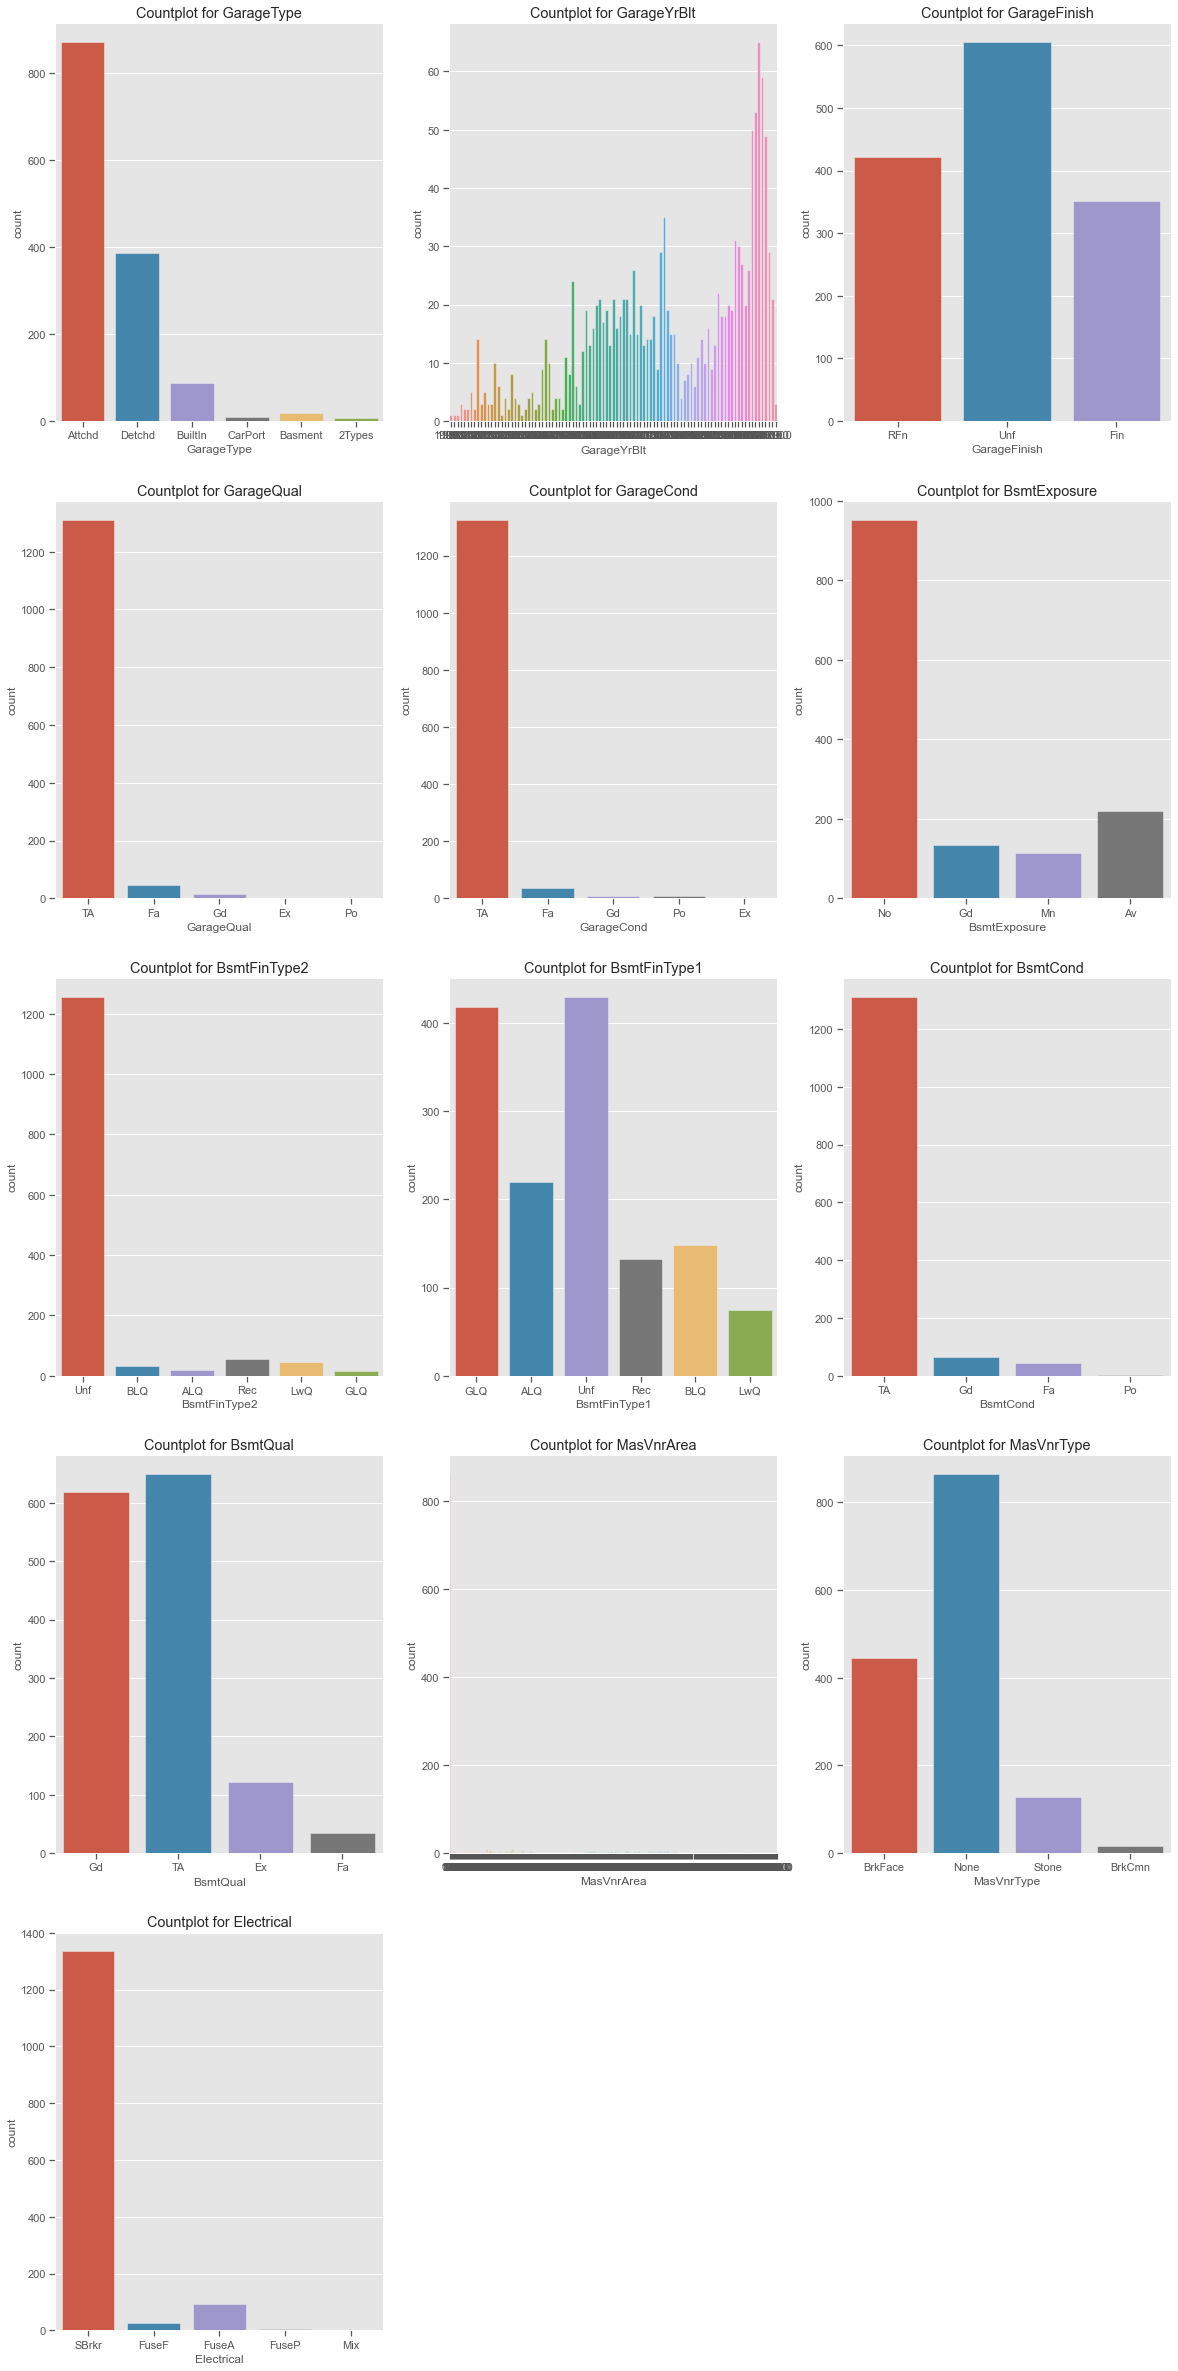

In [221]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(null_data.index,start=1):
    plt.subplot(7,3,i)
    sns.countplot(df[var])
    plt.title(f"Countplot for {var}")

# For these columns, we will perform imputation using the below approach:

*If the column is categorical, we will use mode() to replace the missing values

*If the column is numerical, we will use median() to replace the missing values

*If the column value NA has a meaningful value (For e.g. GarageType = NA refers to "No Garage"). We will replace these values with None

In [222]:
# Impute "GarageType" with 'None' as it has a meaningful value
df['GarageType'].fillna('None', inplace=True)

In [223]:
# Impute "GarageYrBlt" with Median value
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [224]:
# Impute "GarageFinish" with 'None' as it has a meaningful value
df['GarageFinish'].fillna('None', inplace=True)

In [225]:
# Impute "GarageQual" with 'None' as it has a meaningful value
df['GarageQual'].fillna('None', inplace=True)

In [226]:
# Impute "GarageQual" with 'None' as it has a meaningful value
df['GarageCond'].fillna('None', inplace=True)

In [227]:
# Impute "BsmtExposure" with 'None' as it has a meaningful value
df['BsmtExposure'].fillna('None', inplace=True)

In [228]:
# Impute "BsmtFinType2" with 'None' as it has a meaningful value
df['BsmtFinType2'].fillna('None', inplace=True)

# Impute "BsmtFinType1" with 'None' as it has a meaningful value
df['BsmtFinType1'].fillna('None', inplace=True)

# Impute "BsmtCond" with 'None' as it has a meaningful value
df['BsmtCond'].fillna('None', inplace=True)

# Impute "BsmtQual" with 'None' as it has a meaningful value
df['BsmtQual'].fillna('None', inplace=True)

# Impute "MasVnrArea" with Median value
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

# Impute "MasVnrType" with Mode value
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)



In [229]:
# Impute "Electrical" with Mode value
val = df['Electrical'].mode()[0]
df['Electrical'].fillna(val, inplace=True)

In [230]:
#Running the NULL value check again to see if there are any null values left over
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


# Dropping unimportant columns



Dropping the columns based on:

If the variance in the column is very less, then it provides little scope for the model to learn. We will be dropping these columns

Few columns are not important such as Id as they don't provide any meaningful insights. We will remove these as well

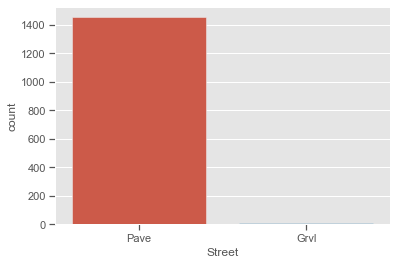

In [231]:
# Dropping "Street" as it doesn't contain much variance. Most values are assigned to "Pave"
sns.countplot(df['Street'])
df.drop(columns='Street', inplace=True)

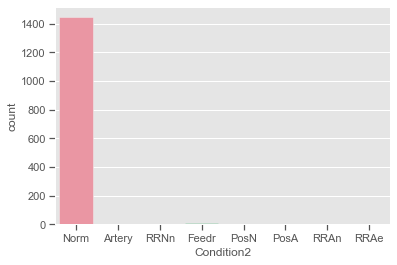

In [232]:
# Dropping "Condition2" as it doesn't contain much variance. Most values are assigned to "Norm"
sns.countplot(df['Condition2'])
df.drop(columns='Condition2', inplace=True)

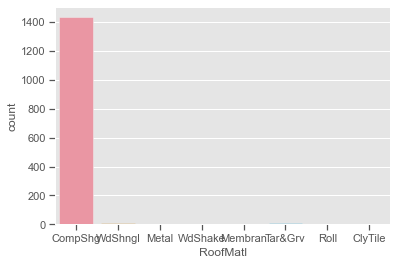

In [233]:
sns.countplot(df['RoofMatl'])
df.drop(columns='RoofMatl', inplace=True)

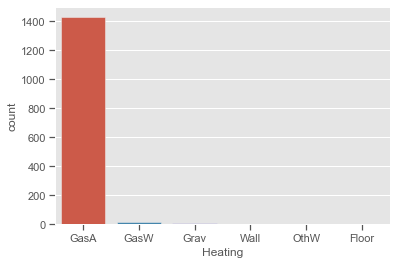

In [234]:
# Dropping "Heating" as it doesn't contain much variance. Most values are assigned to "GasA"
sns.countplot(df['Heating'])
df.drop(columns='Heating', inplace=True)

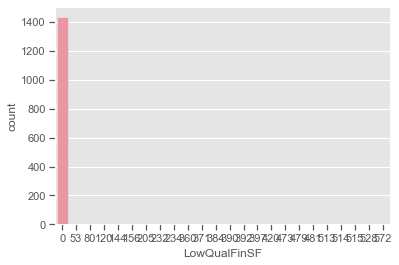

In [235]:
sns.countplot(df['LowQualFinSF'])
df.drop(columns='LowQualFinSF', inplace=True)

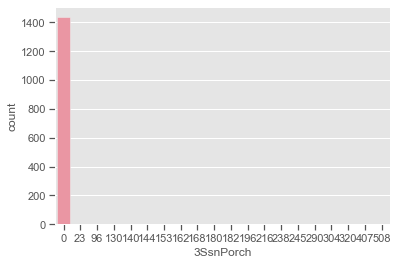

In [236]:
sns.countplot(df['3SsnPorch'])
df.drop(columns='3SsnPorch', inplace=True)

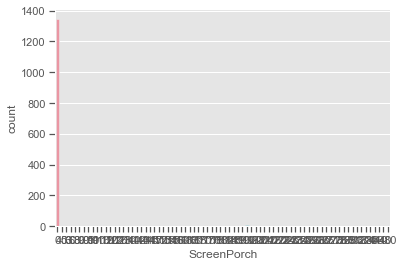

In [237]:
sns.countplot(df['ScreenPorch'])
df.drop(columns='ScreenPorch', inplace=True)

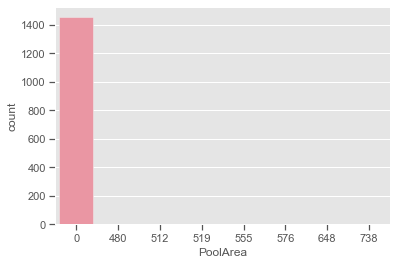

In [238]:
sns.countplot(df['PoolArea'])
df.drop(columns='PoolArea', inplace=True)

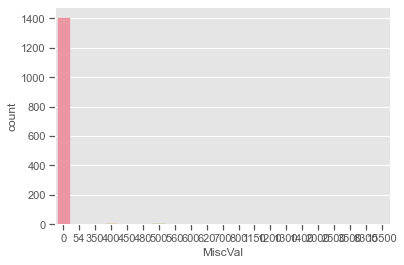

In [239]:
sns.countplot(df['MiscVal'])
df.drop(columns='MiscVal', inplace=True)

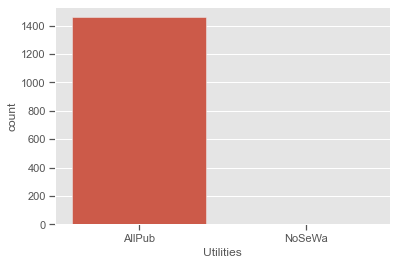

In [240]:
sns.countplot(df['Utilities'])
df.drop(columns='Utilities', inplace=True)


In [241]:
# Dropping "Id" columns as it's not important
df.drop(columns='Id', inplace=True)

In [242]:
df.shape

(1460, 64)

In [243]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,12,2008,WD,Normal,250000


# Handling Year columns

We have 4 year columns. With this, we will create Age columns that track the time in year and remove these columns. 

Age will be calculated by subtracting the Year from the current Year for each column.

YearBuilt

YearRemodAdd

GarageYrBlt

YrSold

In [244]:
CurrentYear = 2021

In [245]:
df['Age_Built_Years'] = CurrentYear - df['YearBuilt']

df['Age_RemodAdd_Years'] = CurrentYear - df['YearRemodAdd']

df['Age_GarageYrBlt_Years'] = CurrentYear - df['GarageYrBlt']

df['Age_YrSold_Years'] = CurrentYear - df['YrSold']

In [246]:
#now dropping all Year columns

df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [247]:
df.shape

(1460, 64)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   MSZoning               1460 non-null   object 
 2   LotArea                1460 non-null   int64  
 3   LotShape               1460 non-null   object 
 4   LandContour            1460 non-null   object 
 5   LotConfig              1460 non-null   object 
 6   LandSlope              1460 non-null   object 
 7   Neighborhood           1460 non-null   object 
 8   Condition1             1460 non-null   object 
 9   BldgType               1460 non-null   object 
 10  HouseStyle             1460 non-null   object 
 11  OverallQual            1460 non-null   int64  
 12  OverallCond            1460 non-null   int64  
 13  RoofStyle              1460 non-null   object 
 14  Exterior1st            1460 non-null   object 
 15  Exte

In [249]:
# Getting categorical variables
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [250]:
# Getting numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'Age_Built_Years',
       'Age_RemodAdd_Years', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

# Checking the distribution of the target variable SalePrice

<Figure size 216x288 with 0 Axes>

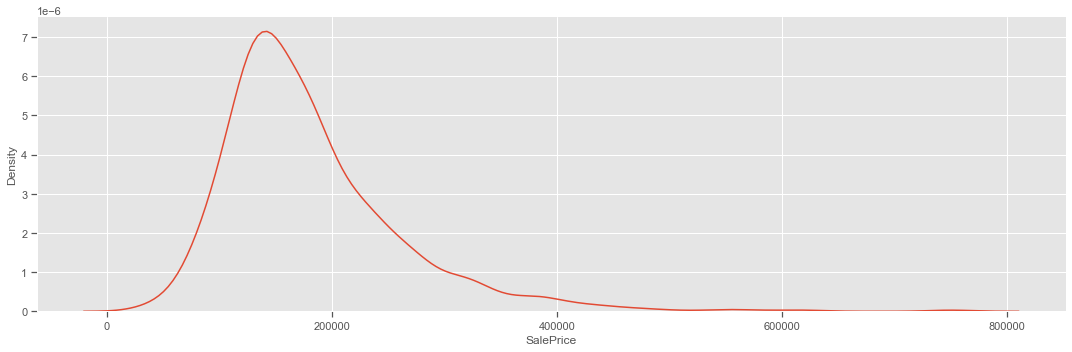

In [251]:
plt.figure(figsize=[3,4])
#sns.displot(df['SalePrice'], aspect=2)


sns.displot(data=df, x="SalePrice", kind="kde", aspect=3)
plt.show()

Note:



Looking at the distribution, we can see that the distribution is skewed towards the right (i.e. outliers on data with high Sales Price). This indicates the presence of outliers.


In such cases, we cannot cap the values as Linear Regression models are interpolated and not extrapolated (i.e. Model will make wrong predictions in case of high Sales Prices).

In [252]:
#Checking skew value of SalePrice
df['SalePrice'].skew()

1.8828757597682129

In [253]:
#Checking kurtosis value of SalePrice
df['SalePrice'].kurtosis()

6.536281860064529

Handling SalePrice high skewness and kurtosis

To handle this, we will perform Log Transformation on "SalePrice" column. This will transform the variable and make it as normally distributed as possible. Basically it reduces the skewness in the data.

<Figure size 1440x1080 with 0 Axes>

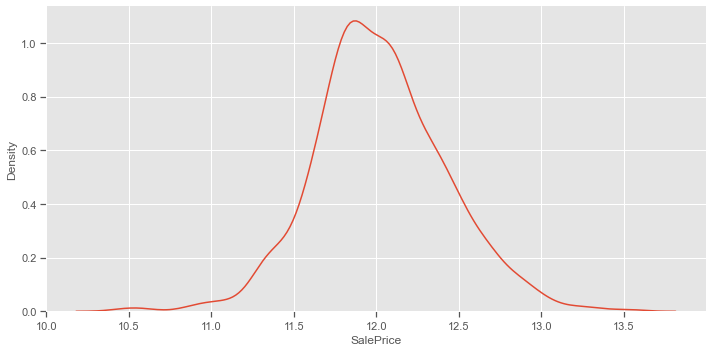

In [254]:
# Plotting distribution of a log transformed "SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(np.log(df['SalePrice']), kind="kde", aspect=2)
plt.show()

Now the data follows more or less a normal distribution

In [255]:
# Create Log Transformed "SalePrice" column
df['Transformed_SalePrice'] = np.log(df['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

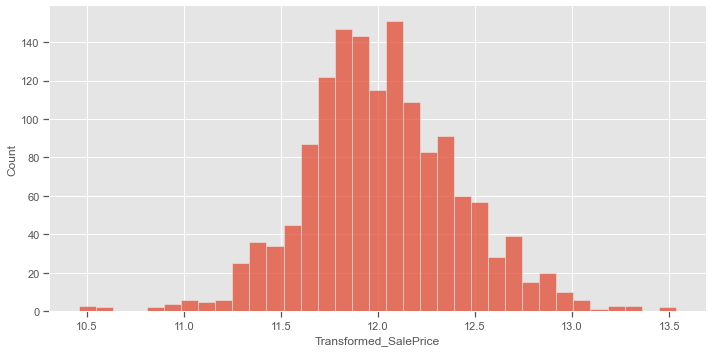

In [256]:
# Plotting distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(df['Transformed_SalePrice'], aspect=2)
plt.show()

In [257]:
# Checking if the newly added field is present in the dataset
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,2,WD,Normal,208500,18,18,18.0,13,12.247694
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,5,WD,Normal,181500,45,45,45.0,14,12.109011
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,9,WD,Normal,223500,20,19,20.0,13,12.317167
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,2,WD,Abnorml,140000,106,51,23.0,15,11.849398
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,12,WD,Normal,250000,21,21,21.0,13,12.429216


In [258]:
df.shape

(1460, 65)

# EDA:

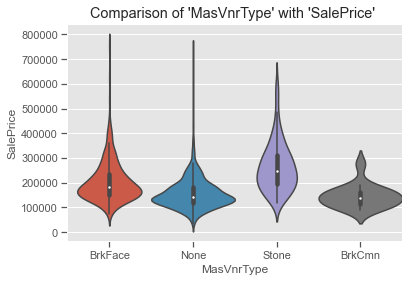

In [259]:
var = 'MasVnrType'
sns.violinplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Stone Masonry Veneer Type has higher median Sales Price compared to other Veneer Types

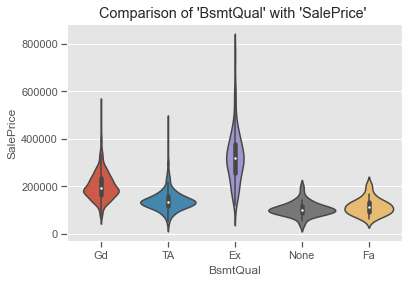

In [260]:
var = 'BsmtQual'

sns.violinplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")



plt.show()

As Basement quality increases from Fair to Excellent, we see a corresponding increase in SalePrice

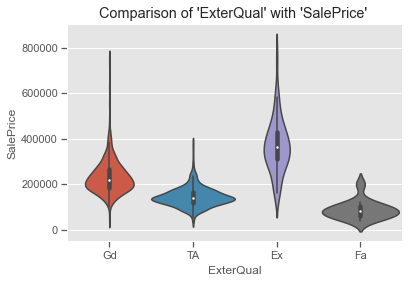

In [261]:
var = 'ExterQual'
sns.violinplot(x=var, y='SalePrice', data=df, width=1)

plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


As Exterior quality increases from Fair to Excellent, we see a corresponding increase in SalePrice

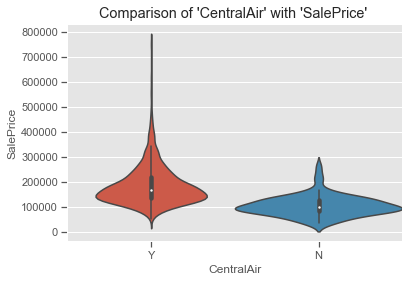

In [262]:
var = 'CentralAir'
sns.violinplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses with Central Air conditioning have a higher median price compared to the houses that don't have Central Air conditioning

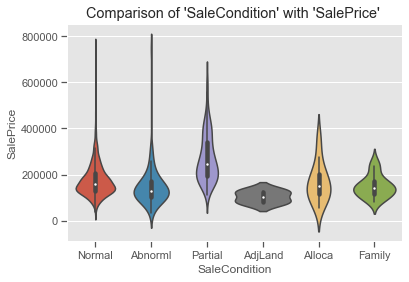

In [263]:
var = 'SaleCondition'
sns.violinplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.

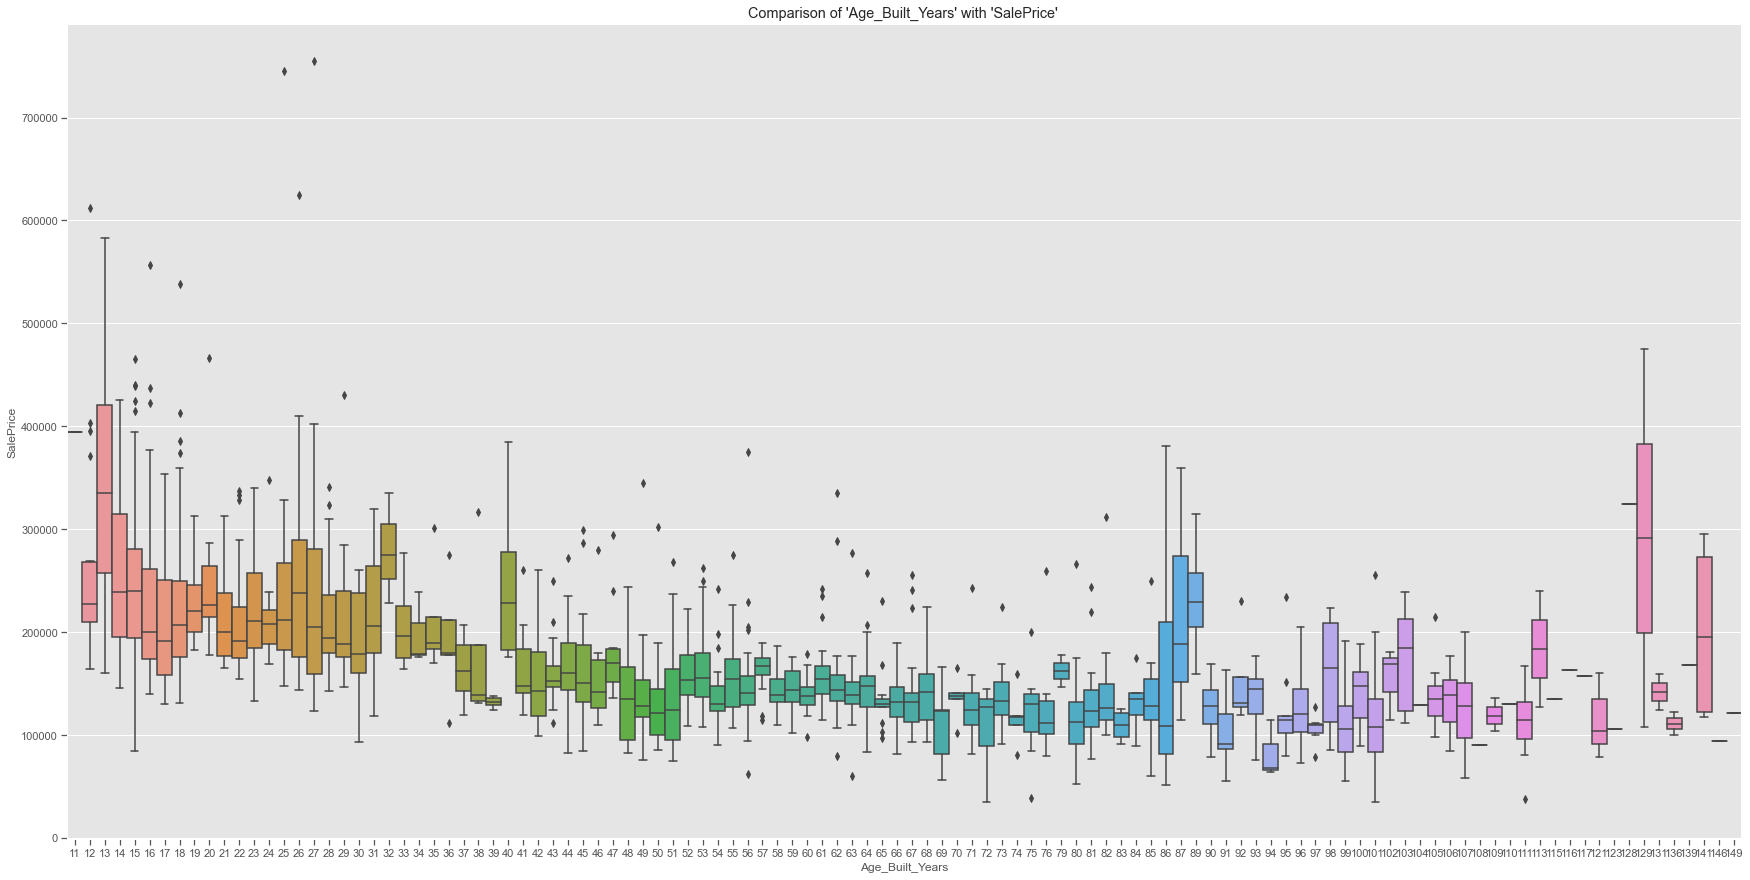

In [264]:
plt.figure(figsize=[30,15])
var = 'Age_Built_Years'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


As the house age increases, we can see that the median SalePrice drops but there are few cases where the SalePrice goes up as well

# Creating a correlation matrix and heatmap

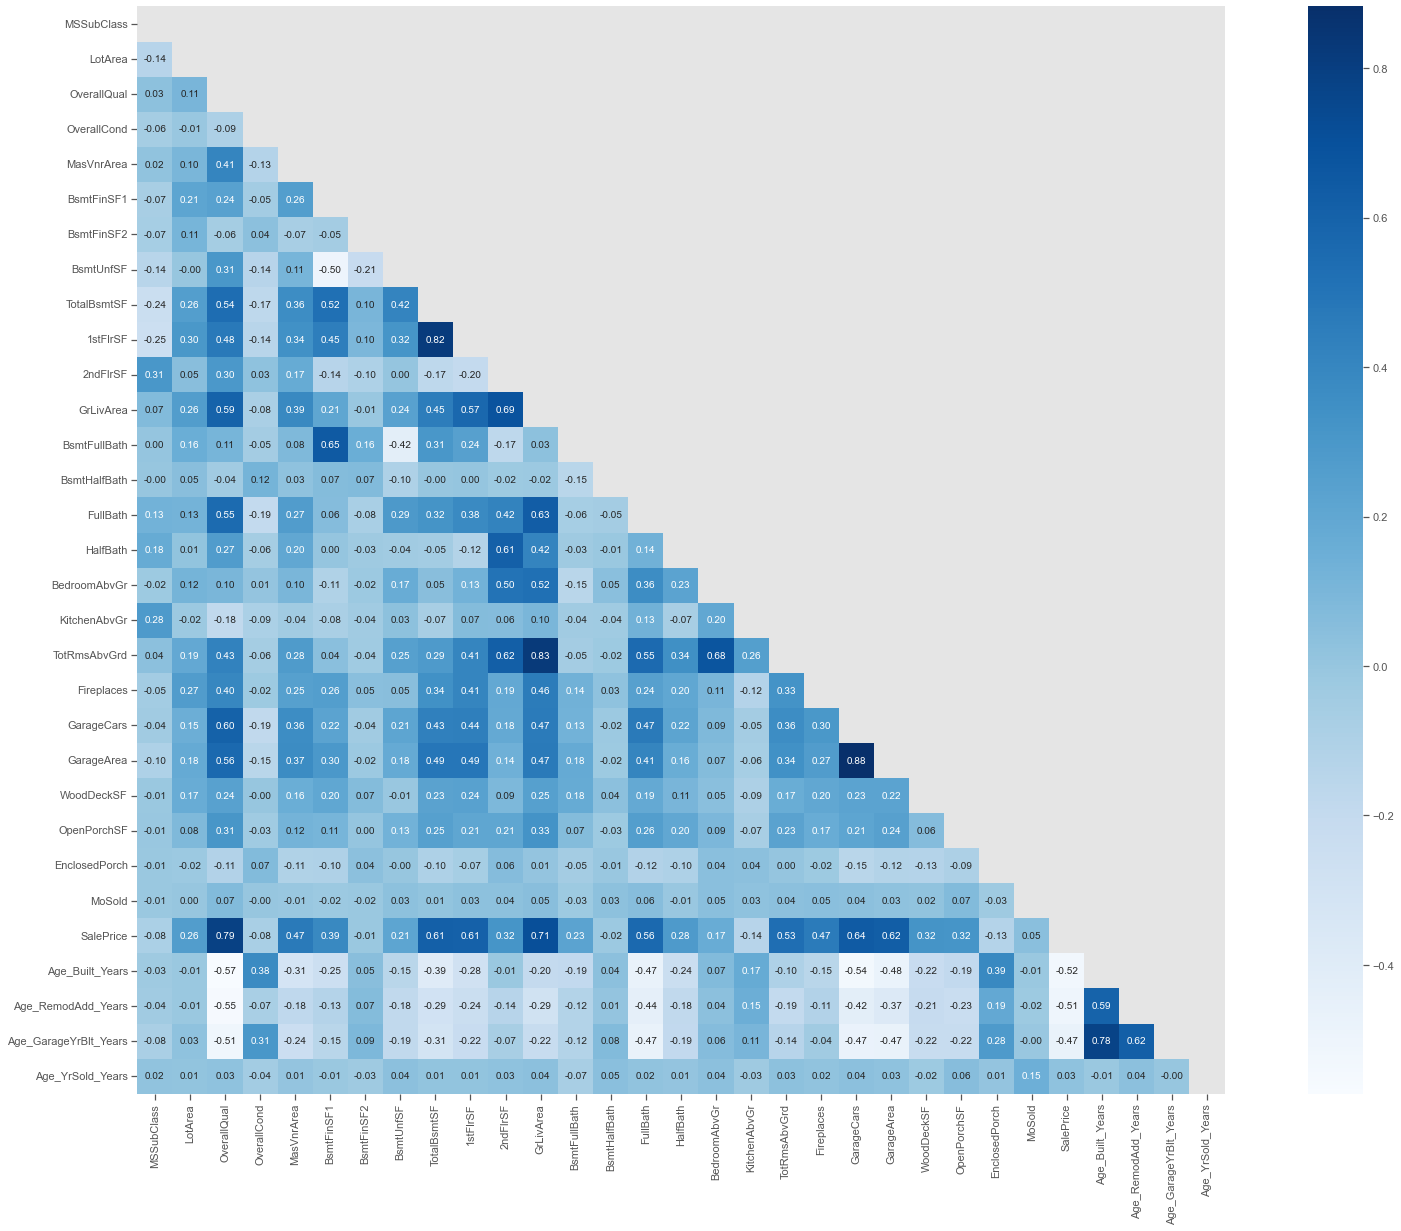

In [265]:
plt.figure(figsize=[30,20])
corr = df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', square=True, mask=mask)
plt.show()


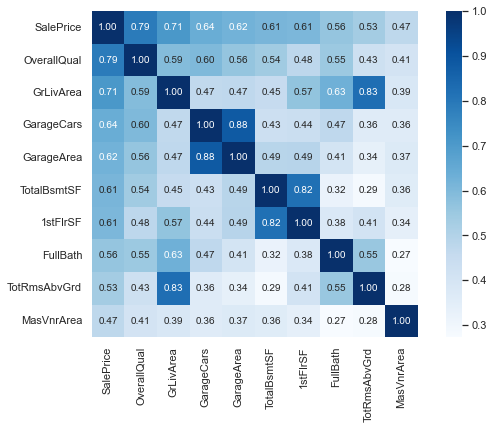

In [266]:
#From this list, we will be picking the top 10 most correlated variables with SalePrice
plt.figure(figsize=[10,6])

k = 10 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()


Here, we will find the below figures:


GrLivArea and TotaRmsAvbGrad are highly correlated at 0.83

TotalBsmtSF and 1stFlrSF are highly correlated at 0.82

GarageArea and GarageCars are highly correlated at 0.88

OverallQual and SalePrice are highly correlated at o.79

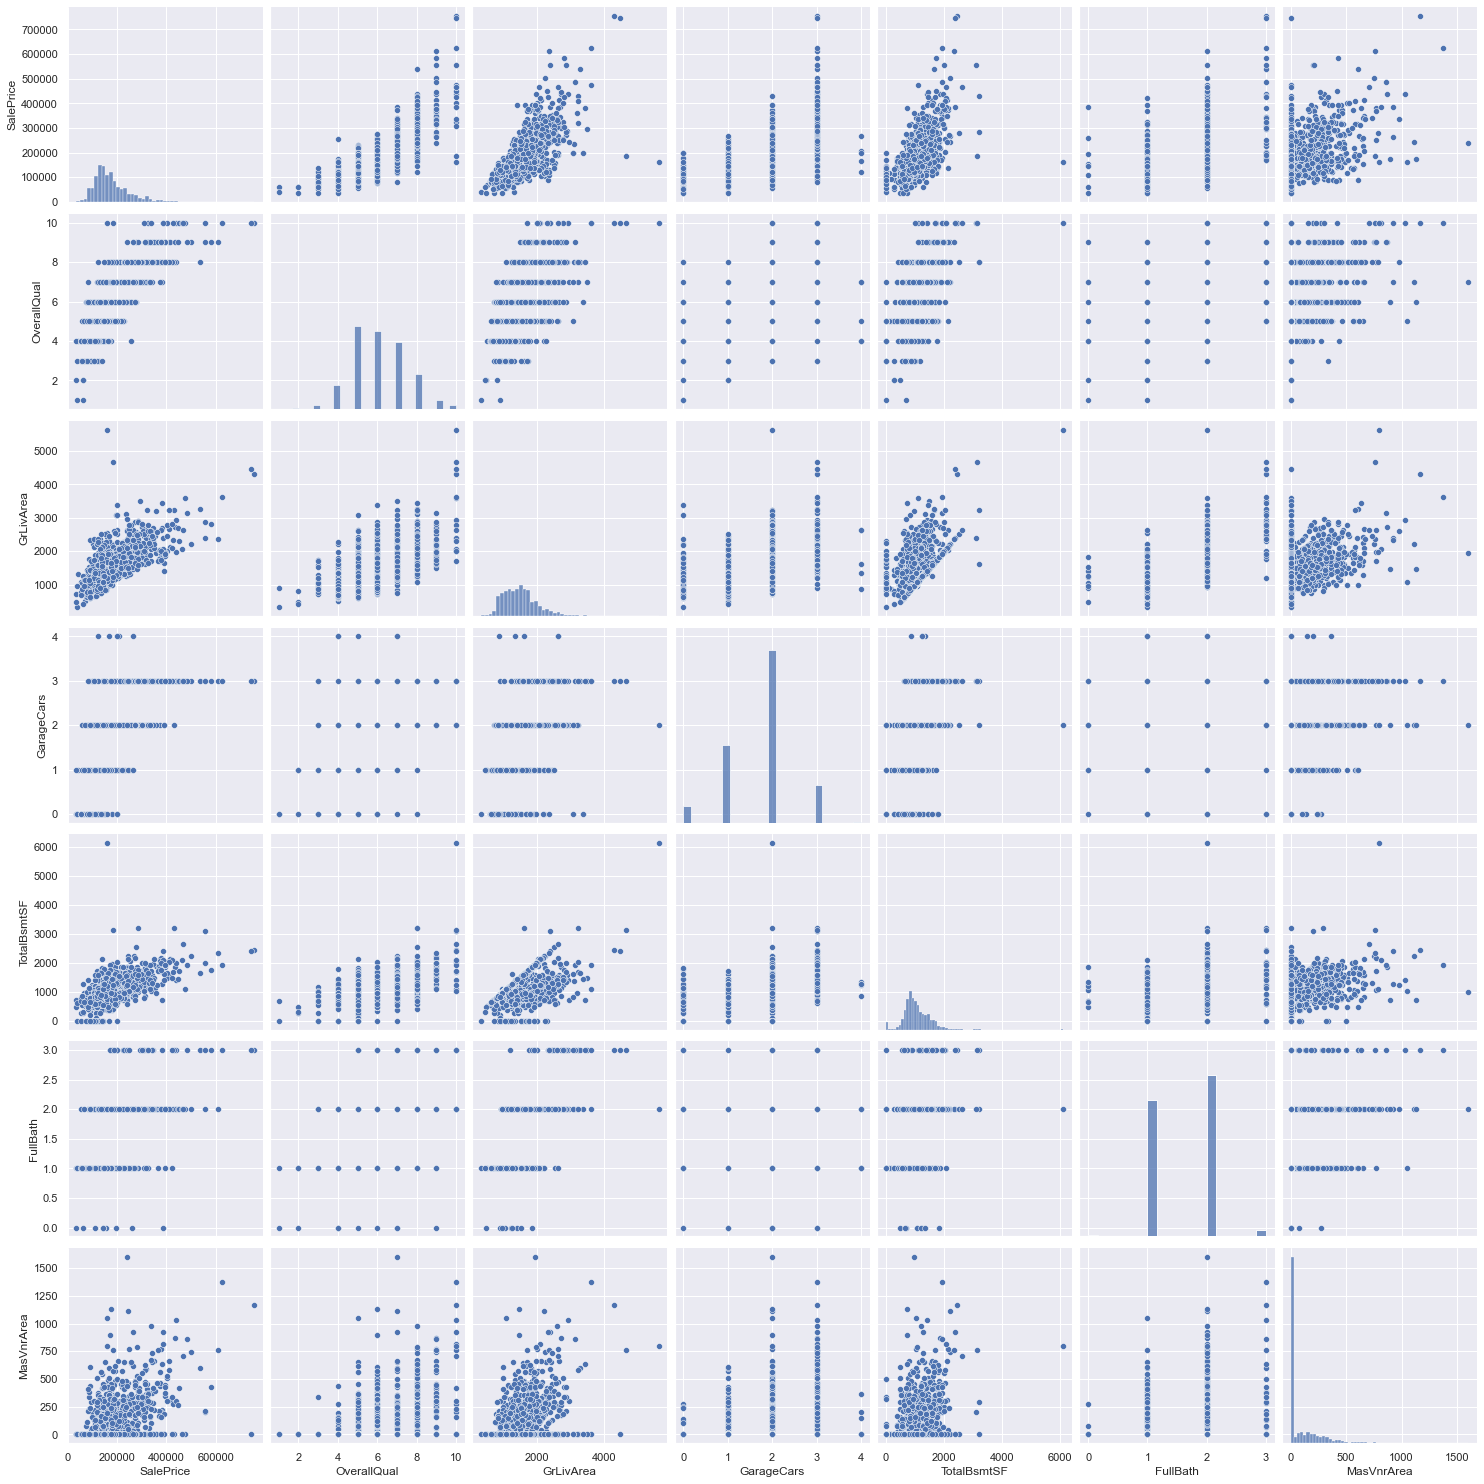

In [267]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df[columns], size=3)
plt.show()

From the pairplot, we can see few observations:

TotalBasementSF, GrLivingArea & OverallQual are linearly correlated with SalePrice

TotalBasementSF and GrLivingArea have a positive correlation

Distribution of MasVnrArea is skewed to the right

# Data Preparation

In [268]:
# Getting categorical variables
cat_var = df.select_dtypes(include='object').columns
print(len(cat_var))

33


# Create One-Hot Encoding for categorical columns

In [269]:
df_categorical = df.select_dtypes(include='object')

In [270]:
df_categorical.columns.shape

(33,)

In [271]:
# One Hot Encoding on categorical columns
df_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [272]:
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [273]:
df.drop(list(df_categorical.columns), axis=1, inplace=True)

In [274]:
df.shape

(1460, 32)

# Merge df and df_dummies dataframes

In [275]:
df = pd.concat([df, df_dummies], axis=1)

In [276]:
df.shape

(1460, 216)

In [277]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,208500,18,18,18.0,13,12.247694,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284

# Divide data into X and y for building the model

In [278]:
X = df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = df['Transformed_SalePrice']

In [279]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,18,18,18.0,13,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,5

In [280]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

# Split data into train and test sets

In [281]:
# Import library from sklearn from train, test & split
from sklearn.model_selection import train_test_split

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [283]:
print(X_train.shape)
print(y_train.shape)

(1022, 214)
(1022,)


In [284]:
print(X_test.shape)
print(y_test.shape)

(438, 214)
(438,)


In [285]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 216 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotArea                1460 non-null   int64  
 2    OverallQual            1460 non-null   int64  
 3    OverallCond            1460 non-null   int64  
 4    MasVnrArea             1460 non-null   float64
 5    BsmtFinSF1             1460 non-null   int64  
 6    BsmtFinSF2             1460 non-null   int64  
 7    BsmtUnfSF              1460 non-null   int64  
 8    TotalBsmtSF            1460 non-null   int64  
 9    1stFlrSF               1460 non-null   int64  
 10   2ndFlrSF               1460 non-null   int64  
 11   GrLivArea              1460 non-null   int64  
 12   BsmtFullBath           1460 non-null   int64  
 13   BsmtHalfBath           1460 non-null   int64  
 14   FullBath               1460 non-null  

# Applying MinMax scaling on numerical features (excluding dummified columns)

In [286]:
# Getting numerical variables
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(num_var))
num_var

30


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'Age_Built_Years', 'Age_RemodAdd_Years',
       'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

In [287]:
# Import library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[num_var] = sc.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = sc.transform(X_test[num_var])

In [288]:
print(X_train.shape)
print(X_test.shape)

(1022, 214)
(438, 214)


# Linear Regression

# Building base model

In [289]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [290]:
# Base Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [291]:
# Checking co-efficients for all features
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-3.926859e-02
LotArea,2.339334e-01
OverallQual,4.511259e-01
OverallCond,2.378426e-01
MasVnrArea,-6.311175e-02
BsmtFinSF1,-4.218814e+11
BsmtFinSF2,-8.424173e+10
BsmtUnfSF,-1.746128e+11
TotalBsmtSF,4.567143e+11
1stFlrSF,-9.047489e-01


In [292]:
# Checking the Intercept
regressor.intercept_

10.636528340987676

In [293]:
# Making predictions on test data using the model
y_pred = regressor.predict(X_test)

In [294]:
# Showing actual and predicted values side by side
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
892,11.947949,11.925912
1105,12.691580,12.752295
413,11.652687,11.534701
522,11.976659,12.122638
1036,12.661914,12.738923
...,...,...
331,11.842229,11.771377
323,11.745425,11.736529
650,12.235389,12.279879
439,11.608236,11.702355


In [295]:
X_train.shape

(1022, 214)

In [296]:
X_test.shape

(438, 214)

In [297]:
# Import r2_score and mean squared error from library
from sklearn.metrics import r2_score, mean_squared_error

In [298]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9224305949315097
Test r2 score is : -4.850167740137822e+19
Train RSS score is : 12.288217145849561
Test RSS score is : 3.6039181223068136e+21
Train MSE score is : 0.012023695837426185
Test MSE score is : 8.228123566910534e+18


As we can see the train score is good, but test score is really underwhelming. This is the same behavior for Mean Squared Error as well. This means that the model is overfitting.

Approach

As the columns are high, we will use RFE (Recursive Feature Elimination) approach to select 50 columns first and remove columns with high VIF

# Model 1: Building model using RFE

In [300]:
#Importing RFE from library

from sklearn.feature_selection import RFE

In [301]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

Out of 214 features, we will go ahead and select 50 initially

In [302]:
# Instantiating a LinearRegression object
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [303]:
# Checking list of selections and ranking of each variable by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 95),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 8),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 7),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 49),
 ('FullBath', False, 28),
 ('HalfBath', False, 32),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 51),
 ('TotRmsAbvGrd', False, 22),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 88),
 ('WoodDeckSF', False, 37),
 ('OpenPorchSF', False, 142),
 ('EnclosedPorch', True, 1),
 ('MoSold', False, 60),
 ('Age_Built_Years', True, 1),
 ('Age_RemodAdd_Years', True, 1),
 ('Age_GarageYrBlt_Years', False, 62),
 ('Age_YrSold_Years', False, 144),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 112),
 ('LotShape_IR3', True,

In [304]:
# Looking at the 50 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'EnclosedPorch',
       'Age_Built_Years', 'Age_RemodAdd_Years', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Blueste',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_RRNe',
       'BldgType_Twnhs', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA',
       'BsmtExposure_None', 'BsmtFinType1_None', 'HeatingQC_Po',
       'Functional_Maj2', 'Functional_Sev', 'GarageType_None', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_None', 'SaleType_ConLD',
       'SaleType_Oth'],
      dtype='object')

In [305]:
# Looking at the variables which were NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF',
       ...
       'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=164)

# Model 2: Building model using 50 features

In [306]:
# Creating a dataframe "X_train_rfe" with variables selected by RFE
X_train_rfe = X_train[col]

In [307]:
X_train_rfe.shape

(1022, 50)

In [308]:
# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [309]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [310]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.891
Model:                               OLS   Adj. R-squared:                  0.886
Method:                    Least Squares   F-statistic:                     170.2
Date:                   Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                           20:30:42   Log-Likelihood:                 637.34
No. Observations:                   1022   AIC:                            -1179.
Df Residuals:                        974   BIC:                            -942.1
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [311]:
HighVIF = checkVIF(X_train_new)

Getting features that have VIF over 5

In [312]:
HighVIF[ HighVIF['VIF'] >=5 ]

,Features,VIF
44,GarageType_None,inf
48,GarageCond_None,inf
40,BsmtFinType1_None,inf
39,BsmtExposure_None,inf
37,BsmtQual_None,inf
0,const,782.51
9,GrLivArea,152.15
8,2ndFlrSF,107.57
7,1stFlrSF,86.65
19,MSZoning_RL,49.59


In [313]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)

In [314]:
len(highVIF_columns)

18

In [315]:
highVIF_columns.remove('const')

In [316]:
len(highVIF_columns)

17

In [317]:
highVIF_columns

['GarageType_None',
 'GarageCond_None',
 'BsmtFinType1_None',
 'BsmtExposure_None',
 'BsmtQual_None',
 'GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'MSZoning_RL',
 'MSZoning_RM',
 'GarageQual_TA',
 'MSZoning_FV',
 'GarageQual_Fa',
 'BsmtQual_TA',
 'BsmtQual_Gd',
 'Age_Built_Years',
 'BsmtFinSF1']

Deleting all columns with high VIF

In [319]:
X_train_rfe.shape

(1022, 50)

In [320]:
X_train_rfe.drop(highVIF_columns, axis=1, inplace=True)

In [321]:
X_train_rfe.shape

(1022, 33)

In [322]:
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtUnfSF,BsmtFullBath,BedroomAbvGr,Fireplaces,GarageCars,EnclosedPorch,Age_RemodAdd_Years,MSZoning_RH,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_RRNe,BldgType_Twnhs,HouseStyle_2.5Unf,Exterior1st_BrkFace,BsmtQual_Fa,HeatingQC_Po,Functional_Maj2,Functional_Sev,GarageQual_Gd,SaleType_ConLD,SaleType_Oth
135,0.000000,0.042534,0.666667,0.625,0.558219,0.000000,0.375,0.333333,0.50,0.0,0.666667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1452,0.941176,0.011101,0.444444,0.500,0.000000,0.333333,0.250,0.000000,0.50,0.0,0.083333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762,0.235294,0.034308,0.666667,0.500,0.313356,0.000000,0.375,0.000000,0.50,0.0,0.016667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,0.000000,0.048470,0.888889,0.500,0.815497,0.000000,0.375,0.333333,0.75,0.0,0.066667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435,0.235294,0.043782,0.666667,0.625,0.029966,0.333333,0.375,0.333333,0.50,0.0,0.233333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Final Model

In [323]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   10.834657
MSSubClass              -0.105300
LotArea                  0.604853
OverallQual              1.106651
OverallCond              0.094259
BsmtUnfSF               -0.008065
BsmtFullBath             0.241124
BedroomAbvGr             0.538466
Fireplaces               0.239586
GarageCars               0.507488
EnclosedPorch           -0.075933
Age_RemodAdd_Years      -0.215516
MSZoning_RH             -0.019193
LotShape_IR3            -0.197868
LandContour_HLS          0.113808
LandContour_Low          0.142224
LandContour_Lvl          0.079304
Neighborhood_Blueste    -0.132436
Neighborhood_Crawfor     0.122928
Neighborhood_NoRidge     0.169583
Neighborhood_NridgHt     0.126893
Neighborhood_StoneBr     0.200869
Neighborhood_Veenker     0.106204
Condition1_RRNe          0.171948
BldgType_Twnhs          -0.084121
HouseStyle_2.5Unf       -0.050541
Exterior1st_BrkFace      0.137034
BsmtQual_Fa             -0.014723
HeatingQC_Po            -0.223224
Functional_Maj

In [324]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     163.8
Date:                   Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                           23:38:50   Log-Likelihood:                 456.79
No. Observations:                   1022   AIC:                            -845.6
Df Residuals:                        988   BIC:                            -678.0
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8347      0.051    211.027      0.000      10.734      10.935
MSSubClass              -0.1053      0.023     -4.631      0.000      -0.150      -0.061
LotArea                  0.6049      0.113      5.371      0.000       0.384       0.826
OverallQual              1.1067      0.052     21.474      0.000       1.006       1.208
OverallCond              0.0943      0.039      2.402      0.016       0.017       0.171
BsmtUnfSF               -0.0081      0.033     -0.244      0.807      -0.073       0.057
BsmtFullBath             0.2411      0.035      6.985      0.000       0.173       0.309
BedroomAbvGr             0.5385      0.053     10.205      0.000       0.435       0.642
Fireplaces               0.2396      0.027      8.869      0.000       0.187       0.293
GarageCars               0.5075      0.036     14.233      0.000       0.438       0.577
EnclosedPorch           -0.0759      0.047     -1.601      0.110      -0.169       0.017
Age_RemodAdd_Years      -0.2155      0.019    -11.580      0.000      -0.252      -0.179
MSZoning_RH             -0.0192      0.045     -0.426      0.670      -0.108       0.069
LotShape_IR3            -0.1979      0.059     -3.332      0.001      -0.314      -0.081
LandContour_HLS          0.1138      0.040      2.858      0.004       0.036       0.192
LandContour_Low          0.1422      0.044      3.248      0.001       0.056       0.228
LandContour_Lvl          0.0793      0.027      2.967      0.003       0.027       0.132
Neighborhood_Blueste    -0.1324      0.159     -0.835      0.404      -0.444       0.179
Neighborhood_Crawfor     0.1229      0.029      4.252      0.000       0.066       0.180
Neighborhood_NoRidge     0.1696      0.032      5.311      0.000       0.107       0.232
Neighborhood_NridgHt     0.1269      0.025      4.996      0.000       0.077       0.177
Neighborhood_StoneBr     0.2009      0.038      5.282      0.000       0.126       0.275
Neighborhood_Veenker     0.1062      0.057      1.856      0.064      -0.006       0.218
Condition1_RRNe          0.1719      0.158      1.090      0.276      -0.138       0.482
BldgType_Twnhs          -0.0841      0.033     -2.512      0.012      -0.150      -0.018
HouseStyle_2.5Unf       -0.0505      0.055     -0.914      0.361      -0.159       0.058
Exterior1st_BrkFace      0.1370      0.028      4.836      0.000       0.081       0.193
BsmtQual_Fa             -0.0147      0.031     -0.468      0.640      -0.076       0.047
HeatingQC_Po            -0.2232      0.159     -1.402      0.161      -0.536       0.089
Functional_Maj2         -0.3277      0.080     -4.082      0.000      -0.485      -0.170
Functional_Sev          -0.2558      0.158     -1.619      0.106      -0.566       0.054
GarageQual_Gd           

In [325]:
print(X_train_rfe.shape)
print(X_test.shape)

(1022, 33)
(438, 214)


In [326]:
names = X_train_rfe.columns

In [327]:
# We will create a new dataframe "X_test_new" by removing the columns dropped by the train data set
X_test_new = X_test[names]

In [328]:
X_test_new.shape

(438, 33)

In [329]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)

In [330]:
X_test_new.shape

(438, 34)

# Linear Regression Final Model Evaluation

In [331]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8454899542895111
Test r2 score is : 0.8115685562057797
Train RSS score is : 24.47682809000795
Test RSS score is : 14.001402250123649
Train MSE score is : 0.02394992963797255
Test MSE score is : 0.03196667180393527


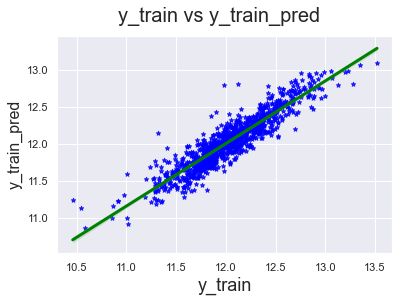

In [332]:
# Plotting graph b/w actual and predicted values with train data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

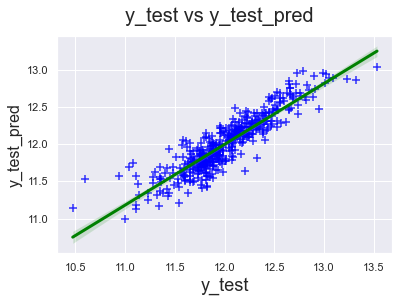

In [333]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'green', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

# Residual Analysis of Train

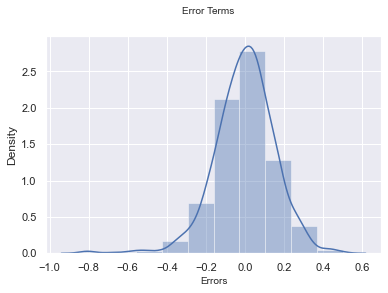

In [340]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res, bins=10, kde=True)
fig.suptitle('Error Terms',fontsize=10)
plt.xlabel('Errors',fontsize=10)
plt.show()

# Residual Analysis of Test

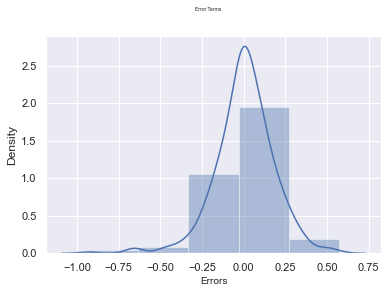

In [343]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=5)
fig.suptitle('Error Terms',fontsize=5)
plt.xlabel('Errors',fontsize=10)
plt.show()

Based on this, we can see that using regular Linear Regression:

Residuals are centered around 0 and normally distributed which satisfies linear regression assumptions

Both train and test predictions are linear in nature compared to the actual values

Train r2 score is : 0.8454899542895111

Test r2 score is : 0.8115685562057797

We will move ahead with Lasso and Ridge Regression to perform regulaization which helps models perform well with unseen data while identifying necessary underlying patterns in it.

In both Ridge and Lasso regression, which both allow some bias to get a significant decrease in variance, thereby pushing the model coefficients towards 0.

In Lasso, some of these coefficients become 0, thus resulting in model selection and, hence, easier interpretation, particularly when the number of coefficients is very large.

# Linear Regression features and coefficients

In [345]:
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
MSSubClass,-0.105300
LotArea,0.604853
OverallQual,1.106651
OverallCond,0.094259
BsmtUnfSF,-0.008065
BsmtFullBath,0.241124
BedroomAbvGr,0.538466
Fireplaces,0.239586
GarageCars,0.507488
EnclosedPorch,-0.075933


In [346]:
# List of 33 features
names = X_train_rfe.columns
print(len(names))
print(list(names))

33
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'EnclosedPorch', 'Age_RemodAdd_Years', 'MSZoning_RH', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_RRNe', 'BldgType_Twnhs', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace', 'BsmtQual_Fa', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'GarageQual_Gd', 'SaleType_ConLD', 'SaleType_Oth']


# Lasso Regression

In [347]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [348]:
# Get only 32 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [349]:
print(X_train.shape)
print(X_test.shape)

(1022, 33)
(438, 33)


In [350]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [351]:
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [352]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010616,0.012111,0.002651,0.000183,0.0001,{'alpha': 0.0001},-0.122828,-0.125769,-0.125579,-0.122911,-0.109915,-0.121400,0.005879,1,-0.116224,-0.114518,-0.114875,-0.116033,-0.118548,-0.116040,0.001414
1,0.004193,0.000206,0.002337,0.000198,0.001,{'alpha': 0.001},-0.121791,-0.128196,-0.129230,-0.125382,-0.112411,-0.123402,0.006071,2,-0.119274,-0.117184,-0.118306,-0.120080,-0.122069,-0.119383,0.001656
2,0.004443,0.001046,0.002240,0.000125,0.01,{'alpha': 0.01},-0.145925,-0.155241,-0.168540,-0.155626,-0.134059,-0.151878,0.011454,3,-0.153289,-0.148596,-0.149706,-0.149849,-0.153959,-0.151080,0.002133
3,0.004217,0.000691,0.002442,0.000291,0.05,{'alpha': 0.05},-0.272997,-0.271448,-0.304363,-0.264130,-0.244838,-0.271555,0.019222,4,-0.270532,-0.272349,-0.265765,-0.271593,-0.275803,-0.271208,0.003245
4,0.003693,0.000145,0.002238,0.000089,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [353]:
cv_results.shape

(28, 21)

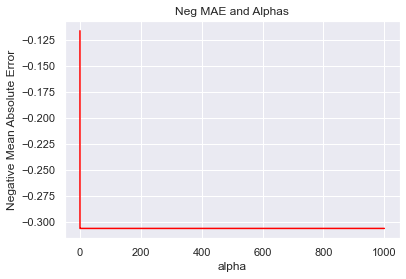

In [358]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='red')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

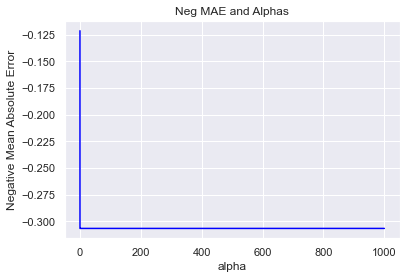

In [359]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

# Getting the optimal value of lambda

In [360]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

# Build final Lasso Regression model

In [361]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [362]:
lasso.coef_

array([-0.10441412,  0.56286358,  1.10373749,  0.08785443, -0.00280637,
        0.24600613,  0.53263105,  0.24136408,  0.50563301, -0.07421565,
       -0.21729568, -0.01254756, -0.1805509 ,  0.10507276,  0.1349923 ,
        0.07177651, -0.03146502,  0.12022561,  0.16642409,  0.12373245,
        0.19507683,  0.09473922,  0.07045041, -0.08223163, -0.04120362,
        0.13615259, -0.01336696, -0.12126737, -0.30537728, -0.15064864,
        0.0362098 ,  0.01636298,  0.21948998])

# Lasso features and their co-efficients

In [363]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.104414
LotArea,0.562864
OverallQual,1.103737
OverallCond,0.087854
BsmtUnfSF,-0.002806
BsmtFullBath,0.246006
BedroomAbvGr,0.532631
Fireplaces,0.241364
GarageCars,0.505633
EnclosedPorch,-0.074216


# Lasso Regression Model Evaluation

In [365]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8450334227970837
Test r2 score is : 0.8141359064642736
Train RSS score is : 24.549149878578
Test RSS score is : 13.81063523713304
Train MSE score is : 0.02402069459743444
Test MSE score is : 0.031531130678385935


# Ridge Regression

In [366]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [367]:
# Get only 32 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [368]:
print(X_train.shape)
print(X_test.shape)

(1022, 33)
(438, 33)


In [369]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [370]:
# Applying lasso regression with 5 fold cross validation

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [371]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032165,0.056126,0.002548,0.000529,0.0001,{'alpha': 0.0001},-0.122940,-0.125807,-0.125346,-0.122790,-0.110233,-0.121423,0.005727,1,-0.116053,-0.114062,-0.114496,-0.115689,-0.118226,-0.115705,0.001458
1,0.004766,0.001596,0.002400,0.000132,0.001,{'alpha': 0.001},-0.122941,-0.125806,-0.125347,-0.122792,-0.110234,-0.121424,0.005727,2,-0.116053,-0.114064,-0.114497,-0.115691,-0.118227,-0.115706,0.001458
2,0.003793,0.000178,0.002292,0.000080,0.01,{'alpha': 0.01},-0.122952,-0.125792,-0.125361,-0.122814,-0.110240,-0.121432,0.005726,3,-0.116059,-0.114076,-0.114508,-0.115702,-0.118239,-0.115717,0.001458
3,0.003888,0.000229,0.002285,0.000098,0.05,{'alpha': 0.05},-0.122997,-0.125732,-0.125421,-0.122906,-0.110266,-0.121464,0.005722,4,-0.116084,-0.114131,-0.114551,-0.115752,-0.118288,-0.115761,0.001457
4,0.003739,0.000165,0.002258,0.000077,0.1,{'alpha': 0.1},-0.123049,-0.125673,-0.125495,-0.123011,-0.110295,-0.121504,0.005720,5,-0.116121,-0.114195,-0.114601,-0.115812,-0.118343,-0.115815,0.001455


In [372]:
cv_results.shape

(28, 21)

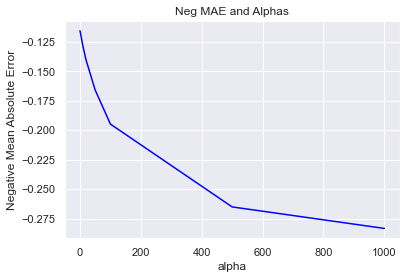

In [373]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

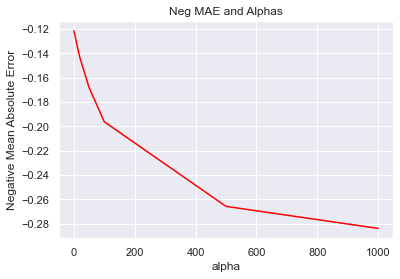

In [374]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='red')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

In [375]:
#the optimal value of lambda

optimalvalue_ridge = model_cv.best_params_['alpha']
optimalvalue_ridge

0.0001

# Build final Ridge Regression model

In [376]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [377]:
ridge.coef_

array([-0.10529972,  0.60482418,  1.1066417 ,  0.09425877, -0.00806282,
        0.24112556,  0.53846431,  0.23958864,  0.50748818, -0.07593358,
       -0.21551723, -0.01919369, -0.19786116,  0.11380824,  0.14222512,
        0.07930301, -0.1324244 ,  0.12292778,  0.16958412,  0.126894  ,
        0.20086929,  0.10620292,  0.17193107, -0.08412133, -0.05054031,
        0.13703384, -0.0147241 , -0.22320223, -0.32767102, -0.25580867,
        0.04334058,  0.03304453,  0.32573202])

#Ridge features and their co-efficients



In [379]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.105300
LotArea,0.604824
OverallQual,1.106642
OverallCond,0.094259
BsmtUnfSF,-0.008063
BsmtFullBath,0.241126
BedroomAbvGr,0.538464
Fireplaces,0.239589
GarageCars,0.507488
EnclosedPorch,-0.075934


# Ridge Regression Model Evaluation

In [380]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8454899542526251
Test r2 score is : 0.8115690710771611
Train RSS score is : 24.476828095851282
Test RSS score is : 14.001363992595213
Train MSE score is : 0.0239499296436901
Test MSE score is : 0.03196658445797994


# Comparison of co-efficients after Regularization

In [381]:
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_

In [382]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,1.106651,1.106642,1.103737
LotArea,0.604853,0.604824,0.562864
BedroomAbvGr,0.538466,0.538464,0.532631
GarageCars,0.507488,0.507488,0.505633
BsmtFullBath,0.241124,0.241126,0.246006
Fireplaces,0.239586,0.239589,0.241364
SaleType_Oth,0.325766,0.325732,0.219490
Neighborhood_StoneBr,0.200869,0.200869,0.195077
Neighborhood_NoRidge,0.169583,0.169584,0.166424
Exterior1st_BrkFace,0.137034,0.137034,0.136153


# Observations

There are 33 significant features in the model

The features are sorted in the order of decreasing significance of the co-efficients (i.e. The most significant 
feature is at the top, followed by the next significant one and so on...)

The co-efficients are very close for Ridge and Lasso Regression models post regularization with slight variance to 
the model created by Linear Regression

However, the resultant selection of significant feature order still remains the same

In [383]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.845490,0.845490,0.845033
1,R2 Score (Test),0.811569,0.811569,0.814136
2,RSS (Train),24.476828,24.476828,24.549150
3,RSS (Test),14.001402,14.001364,13.810635
4,MSE (Train),0.154758,0.154758,0.154986
5,MSE (Test),0.178792,0.178792,0.177570


# Final observations:



1> The R2 Score, RSS and MSE are all very close for Linear Regression, Ridge and Lasso

2> Lasso has better scores by a very slight margin compared to Ridge and Linear Regression